

<p style="background-color: #008080; font-family: newtimeroman; font-size: 200%; color: #FFF9ED; border-radius: 80px 20px; padding: 25px; text-align: center;"> <b>Bagging & Boosting Methods Capstone Project (Titanic Prediction)</b>

<p 



The goal of this project is to complete the task provided at the following link: [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic/overview).


 ## Titanic Dataset Analysis and Predictive Modeling
#### Introduction
The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during its maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. 
#### Objective
The objective of this project is to build a predictive model to answer the question: “What sorts of people were more likely to survive?” Using passenger data such as name, age, gender, socio-economic class, and other relevant features, we aim to identify the key factors that influenced survival rates.
### Dataset Details
The dataset includes various features related to the passengers on the Titanic, such as:
- **<span style="color:#008080">PassengerID</span>**: Unique identifier for each passenger.
- **<span style="color:#008080">Survived</span>**: Indicator of whether the passenger survived (1) or not (0).
- **<span style="color:#008080">Pclass</span>**: Passenger's socio-economic class (1st, 2nd, 3rd).
- **<span style="color:#008080">Name</span>**: Passenger's name.
- **<span style="color:#008080">Sex</span>**: Passenger's gender.
- **<span style="color:#008080">Age</span>**: Passenger's age.
- **<span style="color:#008080">SibSp</span>**: Number of siblings or spouses aboard the Titanic.
- **<span style="color:#008080">Parch</span>**: Number of parents or children aboard the Titanic.
- **<span style="color:#008080">Ticket</span>**: Ticket number.
- **<span style="color:#008080">Fare</span>**: Amount of money the passenger paid for the ticket.
- **<span style="color:#008080">Cabin</span>**: Cabin number.
- **<span style="color:#008080">Embarked</span>**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).
#### Steps Taken
1. **Data Exploration**: We began by exploring the dataset to understand its structure and the distribution of various features. This included visualizing the data to identify patterns and relationships.

2. **Data Cleaning**: We cleaned the data by handling missing values, correcting data types, and dealing with outliers. For instance, missing ages were imputed using the median age, and missing embarkation points were filled with the most common port.

3. **Feature Engineering**: We created new features from existing ones to enhance the predictive power of our model. For example, we extracted titles from passenger names and created family size features.

4. **Data Preprocessing**: We preprocessed the data by scaling numerical features and encoding categorical features using techniques such as one-hot encoding.

5. **Model Building**: We built several machine learning models, including:
  
   - **<span style="color:#8B0000">Logistic Regression</span>**: A simple yet effective linear model for binary classification.
   - **<span style="color:#8B0000">Decision Tree</span>**: A non-linear model that splits the data into subsets based on feature values.
   - **<span style="color:#8B0000">Random Forest</span>**: An ensemble method that combines multiple decision trees to improve performance.
   - **<span style="color:#8B0000">XGBoost</span>**: An advanced gradient boosting model known for its high performance on structured data.
   - **<span style="color:#8B0000">AdaBoosting Classifier</span>**: An ensemble method that combines the outputs of weak learners to create a strong classifier.
   - **<span style="color:#8B0000">Gradient Boosting Classifier</span>**: An ensemble technique that builds trees sequentially, with each tree attempting to correct the errors of the previous one.
   - **<span style="color:#8B0000">Light GBM</span>**: A gradient boosting framework that uses tree-based learning algorithms, designed for efficient training with large datasets.
   - **<span style="color:#8B0000">K-Nearest Neighbors (KNN)</span>**: A simple, instance-based learning algorithm that classifies a sample based on the majority class of its k-nearest neighbors.
   - **<span style="color:#8B0000">Support Vector Classifier (SVC)</span>**: A supervised learning model that uses classification algorithms for two-group classification problems.
   - **<span style="color:#8B0000">Lazy Predict Library</span>**: A Python library that helps to quickly compare the performance of various machine learning models on a given dataset.
   
####  Comparing Models
We compared the performance of these models using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC. Cross-validation and hyperparameter tuning were also performed to ensure the robustness and optimization of each model.
#### Conclusion
Through this analysis, we aimed to gain insights into the factors that influenced survival rates on the Titanic. By building and evaluating predictive models, we were able to identify key characteristics that made certain groups of people more likely to survive the tragic event. This project not only showcases the application of machine learning techniques but also provides a historical perspective on one of the most significant maritime disasters.

-  **Model Evaluation**: We evaluated the performance of each model using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC. We also performed cross-validation to ensure the robustness of our models.

-  **Hyperparameter Tuning**: We used GridSearchCV to optimize the hyperparameters of our models and improve their performance.

-  **Conclusion and Insights**: We analyzed the results to understand which features were most important in predicting survival. Factors such as passenger class, gender, and age played significant roles in determining the likelihood of survival.

#### Future Work
Future work could include exploring more advanced feature engineering techniques, using additional data sources, and experimenting with other machine learning algorithms to further improve the predictive accuracy of the models.


<h1 style="background-color: #008080; font-family: newtimeroman; font-size: 200%; color: white; border-radius: 40px 10px; padding: 15px; text-align: center;">
  <b>Import Libraries</b>
</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,f1_score, classification_report,confusion_matrix
from sklearn.metrics import  recall_score, precision_score, roc_auc_score, auc
#from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  GridSearchCV
from yellowbrick.classifier import ClassPredictionError, ROCAUC
from sklearn.pipeline  import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from xgboost import XGBClassifier


plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)

<h2 style="color:#008080;">Read Data Set</h2>

In [2]:
df = pd.read_csv("train.csv")
prediction_test = pd.read_csv("test.csv")

<h2 style="color:#008080;"> Data Preparation</h2> 

In [3]:
df.sample(10)

# Encoding islemi Sex, Embarked

PassengerId  Survived  Pclass  \
200          201         0       3   
299          300         1       1   
679          680         1       1   
535          536         1       2   
715          716         0       3   
857          858         1       1   
6              7         0       1   
528          529         0       3   
822          823         0       1   
27            28         0       1   

                                                Name     Sex   Age  SibSp  \
200                   Vande Walle, Mr. Nestor Cyriel    male  28.0      0   
299  Baxter, Mrs. James (Helene DeLaudeniere Chaput)  female  50.0      0   
679               Cardeza, Mr. Thomas Drake Martinez    male  36.0      0   
535                           Hart, Miss. Eva Miriam  female   7.0      0   
715       Soholt, Mr. Peter Andreas Lauritz Andersen    male  19.0      0   
857                           Daly, Mr. Peter Denis     male  51.0      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
528                        Salonen, Mr. Johan Werner    male  39.0      0   
822                  Reuchlin, Jonkheer. John George    male  38.0      0   
27                    Fortune, Mr. Charles Alexander    male  19.0      3   

     Parch        Ticket      Fare        Cabin Embarked  
200      0        345770    9.5000          NaN        S  
299      1      PC 17558  247.5208      B58 B60        C  
679      1      PC 17755  512.3292  B51 B53 B55        C  
535      2  F.C.C. 13529   26.2500          NaN        S  
715      0        348124    7.6500        F G73        S  
857      0        113055   26.5500          E17        S  
6        0         17463   51.8625          E46        S  
528      0       3101296    7.9250          NaN        S  
822      0         19972    0.0000          NaN        S  
27       2         19950  263.0000  C23 C25 C27        S

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe().T

count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   

                  max  
PassengerId  891.0000  
Survived       1.0000  
Pclass         3.0000  
Age           80.0000  
SibSp          8.0000  
Parch          6.0000  
Fare         512.3292

In [6]:
def is_hashable(v):
    try:
        hash(v)
    except TypeError:
        return False
    return True

def column_analysis(df):
    for column in df.columns:
        if all(df[column].apply(is_hashable)):
            unique_values = df[column].unique()
        else:
            unique_values = df[column].astype(str).unique()
            
        unique_count = len(unique_values)
        
        print(f"\033[1m\033[91mColumn:\033[0m \033[1m\033[94m{column}\033[0m")
        print(f"\033[1m\033[92mNumber of Unique Values:\033[93m {unique_count}")
        if unique_count <= 10:
            print(f"\033[1mUnique Values:\033[0m {unique_values}\n")
        else:
            print(f"\033[95mFirst 10 Unique Values:\033[0m {unique_values[:10]}")
            print(f"... and {unique_count - 10} more unique values\n")
        missing_count = df[column].isnull().sum()
        missing_percentage = (missing_count / len(df)) * 100
        print(f"\033[1mThe number of NaN values:\033[0m {missing_count}")
        print(f"\033[1mPercentage of NaN values:\033[0m {missing_percentage:.2f}%\n")
        
column_analysis(df)
    

Column: PassengerId
Number of Unique Values: 891
First 10 Unique Values: [ 1  2  3  4  5  6  7  8  9 10]
... and 881 more unique values

The number of NaN values: 0
Percentage of NaN values: 0.00%

Column: Survived
Number of Unique Values: 2
Unique Values: [0 1]

The number of NaN values: 0
Percentage of NaN values: 0.00%

Column: Pclass
Number of Unique Values: 3
Unique Values: [3 1 2]

The number of NaN values: 0
Percentage of NaN values: 0.00%

Column: Name
Number of Unique Values: 891
First 10 Unique Values: ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)']
... and 881 more unique values

The number of NaN values: 0
Percentage of NaN values: 0.00%

Column: Sex
Number of Unique Value

  <h1 style="background-color: #008080; font-family: newtimeroman; font-size: 200%; color: white; border-radius: 40px 10px; padding: 15px; text-align: center;"> <b> Exploratory Data Analysis (EDA)</b>
</h1>

In [7]:
df['family'] = df['SibSp'] + df['Parch']
df = df.drop(columns = ['SibSp', 'Parch'])

In [8]:
df['alone'] = np.where(df['family'] == 0, 1, 0)

In [9]:
df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

In [10]:
df

PassengerId  Survived  Pclass     Sex    Age      Fare Embarked  family  \
0              1         0       3    male  22.00    7.2500        S       1   
1              2         1       1  female  38.00   71.2833        C       1   
2              3         1       3  female  26.00    7.9250        S       0   
3              4         1       1  female  35.00   53.1000        S       1   
4              5         0       3    male  35.00    8.0500        S       0   
5              6         0       3    male    NaN    8.4583        Q       0   
6              7         0       1    male  54.00   51.8625        S       0   
7              8         0       3    male   2.00   21.0750        S       4   
8              9         1       3  female  27.00   11.1333        S       2   
9             10         1       2  female  14.00   30.0708        C       1   
10            11         1       3  female   4.00   16.7000        S       2   
11            12         1       1  female  58.00   26.5500        S       0   
12            13         0       3    male  20.00    8.0500        S       0   
13            14         0       3    male  39.00   31.2750        S       6   
14            15         0       3  female  14.00    7.8542        S       0   
15            16         1       2  female  55.00   16.0000        S       0   
16            17         0       3    male   2.00   29.1250        Q       5   
17            18         1       2    male    NaN   13.0000        S       0   
18            19         0       3  female  31.00   18.0000        S       1   
19            20         1       3  female    NaN    7.2250        C       0   
20            21         0       2    male  35.00   26.0000        S       0   
21            22         1       2    male  34.00   13.0000        S       0   
22            23         1       3  female  15.00    8.0292        Q       0   
23            24         1       1    male  28.00   35.5000        S       0   
24            25         0       3  female   8.00   21.0750        S       4   
25            26         1       3  female  38.00   31.3875        S       6   
26            27         0       3    male    NaN    7.2250        C       0   
27            28         0       1    male  19.00  263.0000        S       5   
28            29         1       3  female    NaN    7.8792        Q       0   
29            30         0       3    male    NaN    7.8958        S       0   
30            31         0       1    male  40.00   27.7208        C       0   
31            32         1       1  female    NaN  146.5208        C       1   
32            33         1       3  female    NaN    7.7500        Q       0   
33            34         0       2    male  66.00   10.5000        S       0   
34            35         0       1    male  28.00   82.1708        C       1   
35            36         0       1    male  42.00   52.0000        S       1   
36            37         1       3    male    NaN    7.2292        C       0   
37            38         0       3    male  21.00    8.0500        S       0   
38            39         0       3  female  18.00   18.0000        S       2   
39            40         1       3  female  14.00   11.2417        C       1   
40            41         0       3  female  40.00    9.4750        S       1   
41            42         0       2  female  27.00   21.0000        S       1   
42            43         0       3    male    NaN    7.8958        C       0   
43            44         1       2  female   3.00   41.5792        C       3   
44            45         1       3  female  19.00    7.8792        Q       0   
45            46         0       3    male    NaN    8.0500        S       0   
46            47         0       3    male    NaN   15.5000        Q       1   
47            48         1       3  female    NaN    7.7500        Q       0   
48            49         0       3    male    NaN   21.6792        C       2   
49   

<h2 style="background-color: #008080; font-family: newtimeroman; font-size: 200%; color: white; border-radius: 40px 10px; padding: 15px; text-align: center;"> <b> Handling with Null Values</b>
</h2>

<h3 style="color:#008080;"> Embarked </h3>

In [11]:
df["Embarked"].isna().sum()

2

In [12]:
from sklearn.impute import SimpleImputer

simple_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
simple_imp.fit(df[["Embarked"]])
df[["Embarked"]] = simple_imp.fit_transform(df[["Embarked"]])

In [13]:
class_mapping = {'S': 0, 'C': 1, 'Q': 2}
df['Embarked'] = df['Embarked'].map(class_mapping)

In [14]:
df['Embarked'].value_counts()

Embarked
0    646
1    168
2     77
Name: count, dtype: int64

<h3 style="color:#008080;"> Age </h3>

In [15]:
from sklearn.impute import KNNImputer

KNN_imputer = KNNImputer(n_neighbors = 4)
df[["Age"]] = KNN_imputer.fit_transform(df[["Age"]])

In [16]:
df["Age"].isna().sum()

0

<h3 style="color:#008080;"> Pclass</h3>

In [17]:
class_mapping = {3:2, 2:1, 1:0}
df['Pclass'] = df['Pclass'].map(class_mapping)

In [18]:
df['Pclass'].value_counts()
# 2 = 3
# 0 = 1
# 1 = 2

Pclass
2    491
0    216
1    184
Name: count, dtype: int64

<h3 style="color:#008080;"> Sex</h3>

In [19]:
class_mapping = {'female': 0, 'male': 1}
df['Sex'] = df['Sex'].map(class_mapping)

In [20]:
df['Sex'].value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

In [21]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
family         0
alone          0
dtype: int64

<h1 style="background-color: #008080; font-family: newtimeroman; font-size: 200%; color: white; border-radius: 40px 10px; padding: 15px; text-align: center;"> <b> Data Visualization</b>
</h1>

In [22]:
def create_pie_chart_of_count(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    fig = px.pie(df_not_null.groupby([column_name]).size().reset_index(name='count'), names=column_name, values='count')
    fig.show()

create_pie_chart_of_count(df, 'Sex')
create_pie_chart_of_count(df, 'Embarked')
create_pie_chart_of_count(df, 'Survived')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


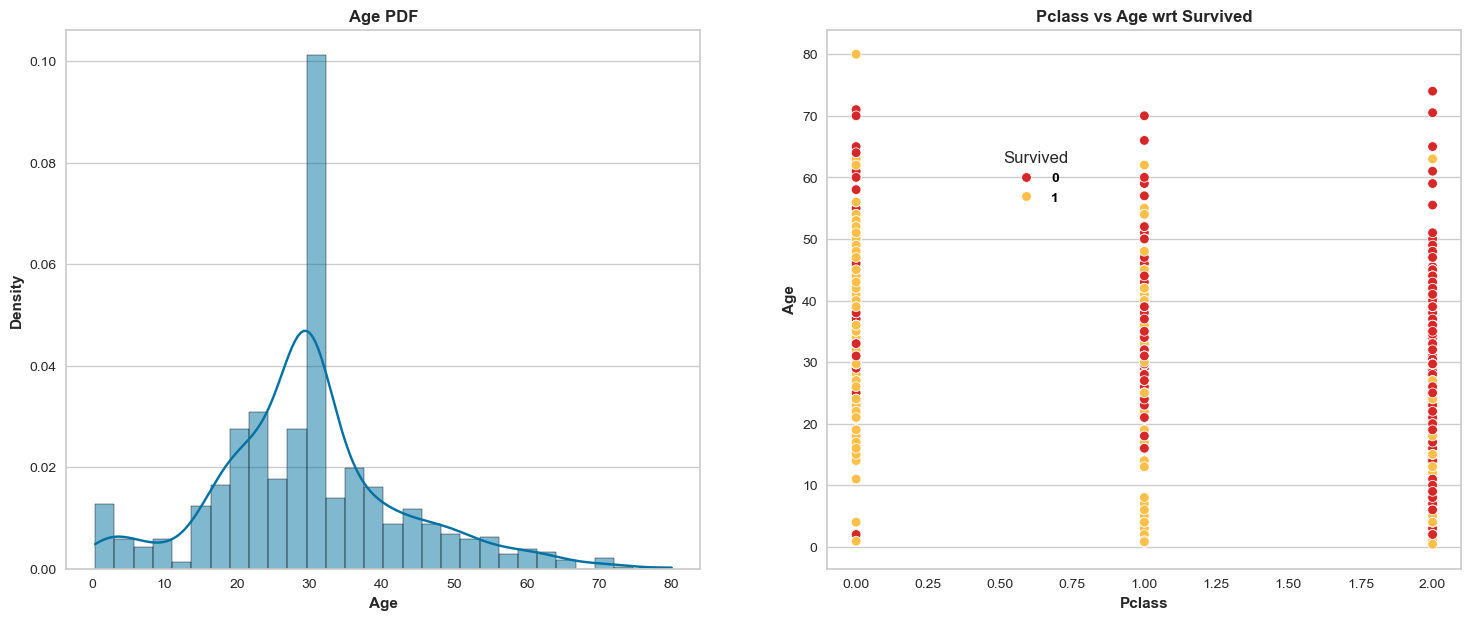

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(18, 7))

mean = df["Age"].mean()
mode = df["Age"].mode()
median = df["Age"].median()

sns.histplot(df["Age"], stat="density", kde=True, ax=axs[0])
axs[0].set_title("Age PDF", fontweight="bold")
axs[0].set_xlabel("Age", fontweight="bold")
axs[0].set_ylabel("Density", fontweight="bold")
l = axs[0].legend()
for text in l.get_texts():
    text.set_fontweight("bold")
    text.set_color("black")
axs[0].grid(axis="x")

sns.scatterplot(x=df["Pclass"], y=df["Age"], hue=df["Survived"], ax=axs[1],palette=["#d62828", "#fcbf49"])
axs[1].set_title("Pclass vs Age wrt Survived", fontweight="bold")
axs[1].set_xlabel("Pclass", fontweight="bold")
axs[1].set_ylabel("Age", fontweight="bold")
axs[1].grid(axis="x")
l = axs[1].legend(loc='upper right', bbox_to_anchor=(0.4, 0.8), title="Survived")
for text in l.get_texts():
    text.set_fontweight("bold")
    text.set_color("black")
plt.show();

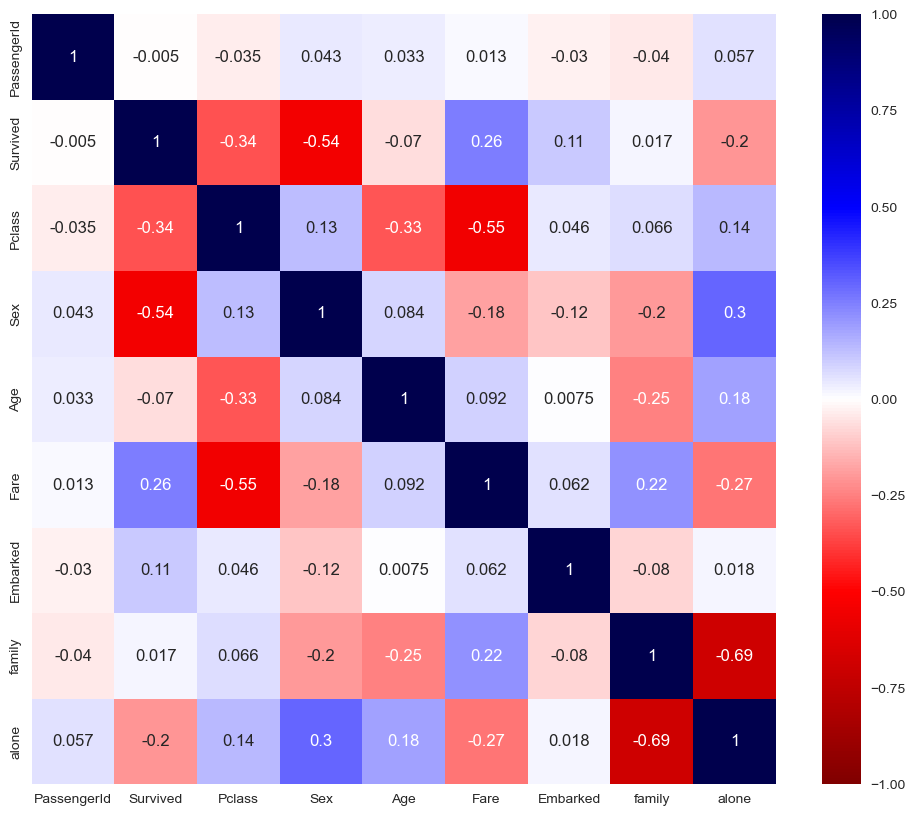

In [24]:
plt.figure(figsize=(12,10))
cor = df.corr(numeric_only=True)
sns.heatmap(cor, annot=True,
            cmap=plt.cm.seismic_r, vmin=-1, vmax=1)
plt.show()


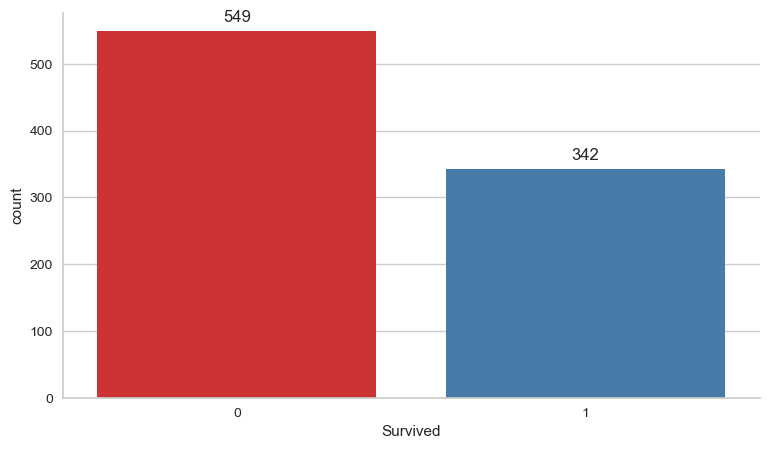

In [25]:
ax = sns.countplot(x=df["Survived"], palette='Set1')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

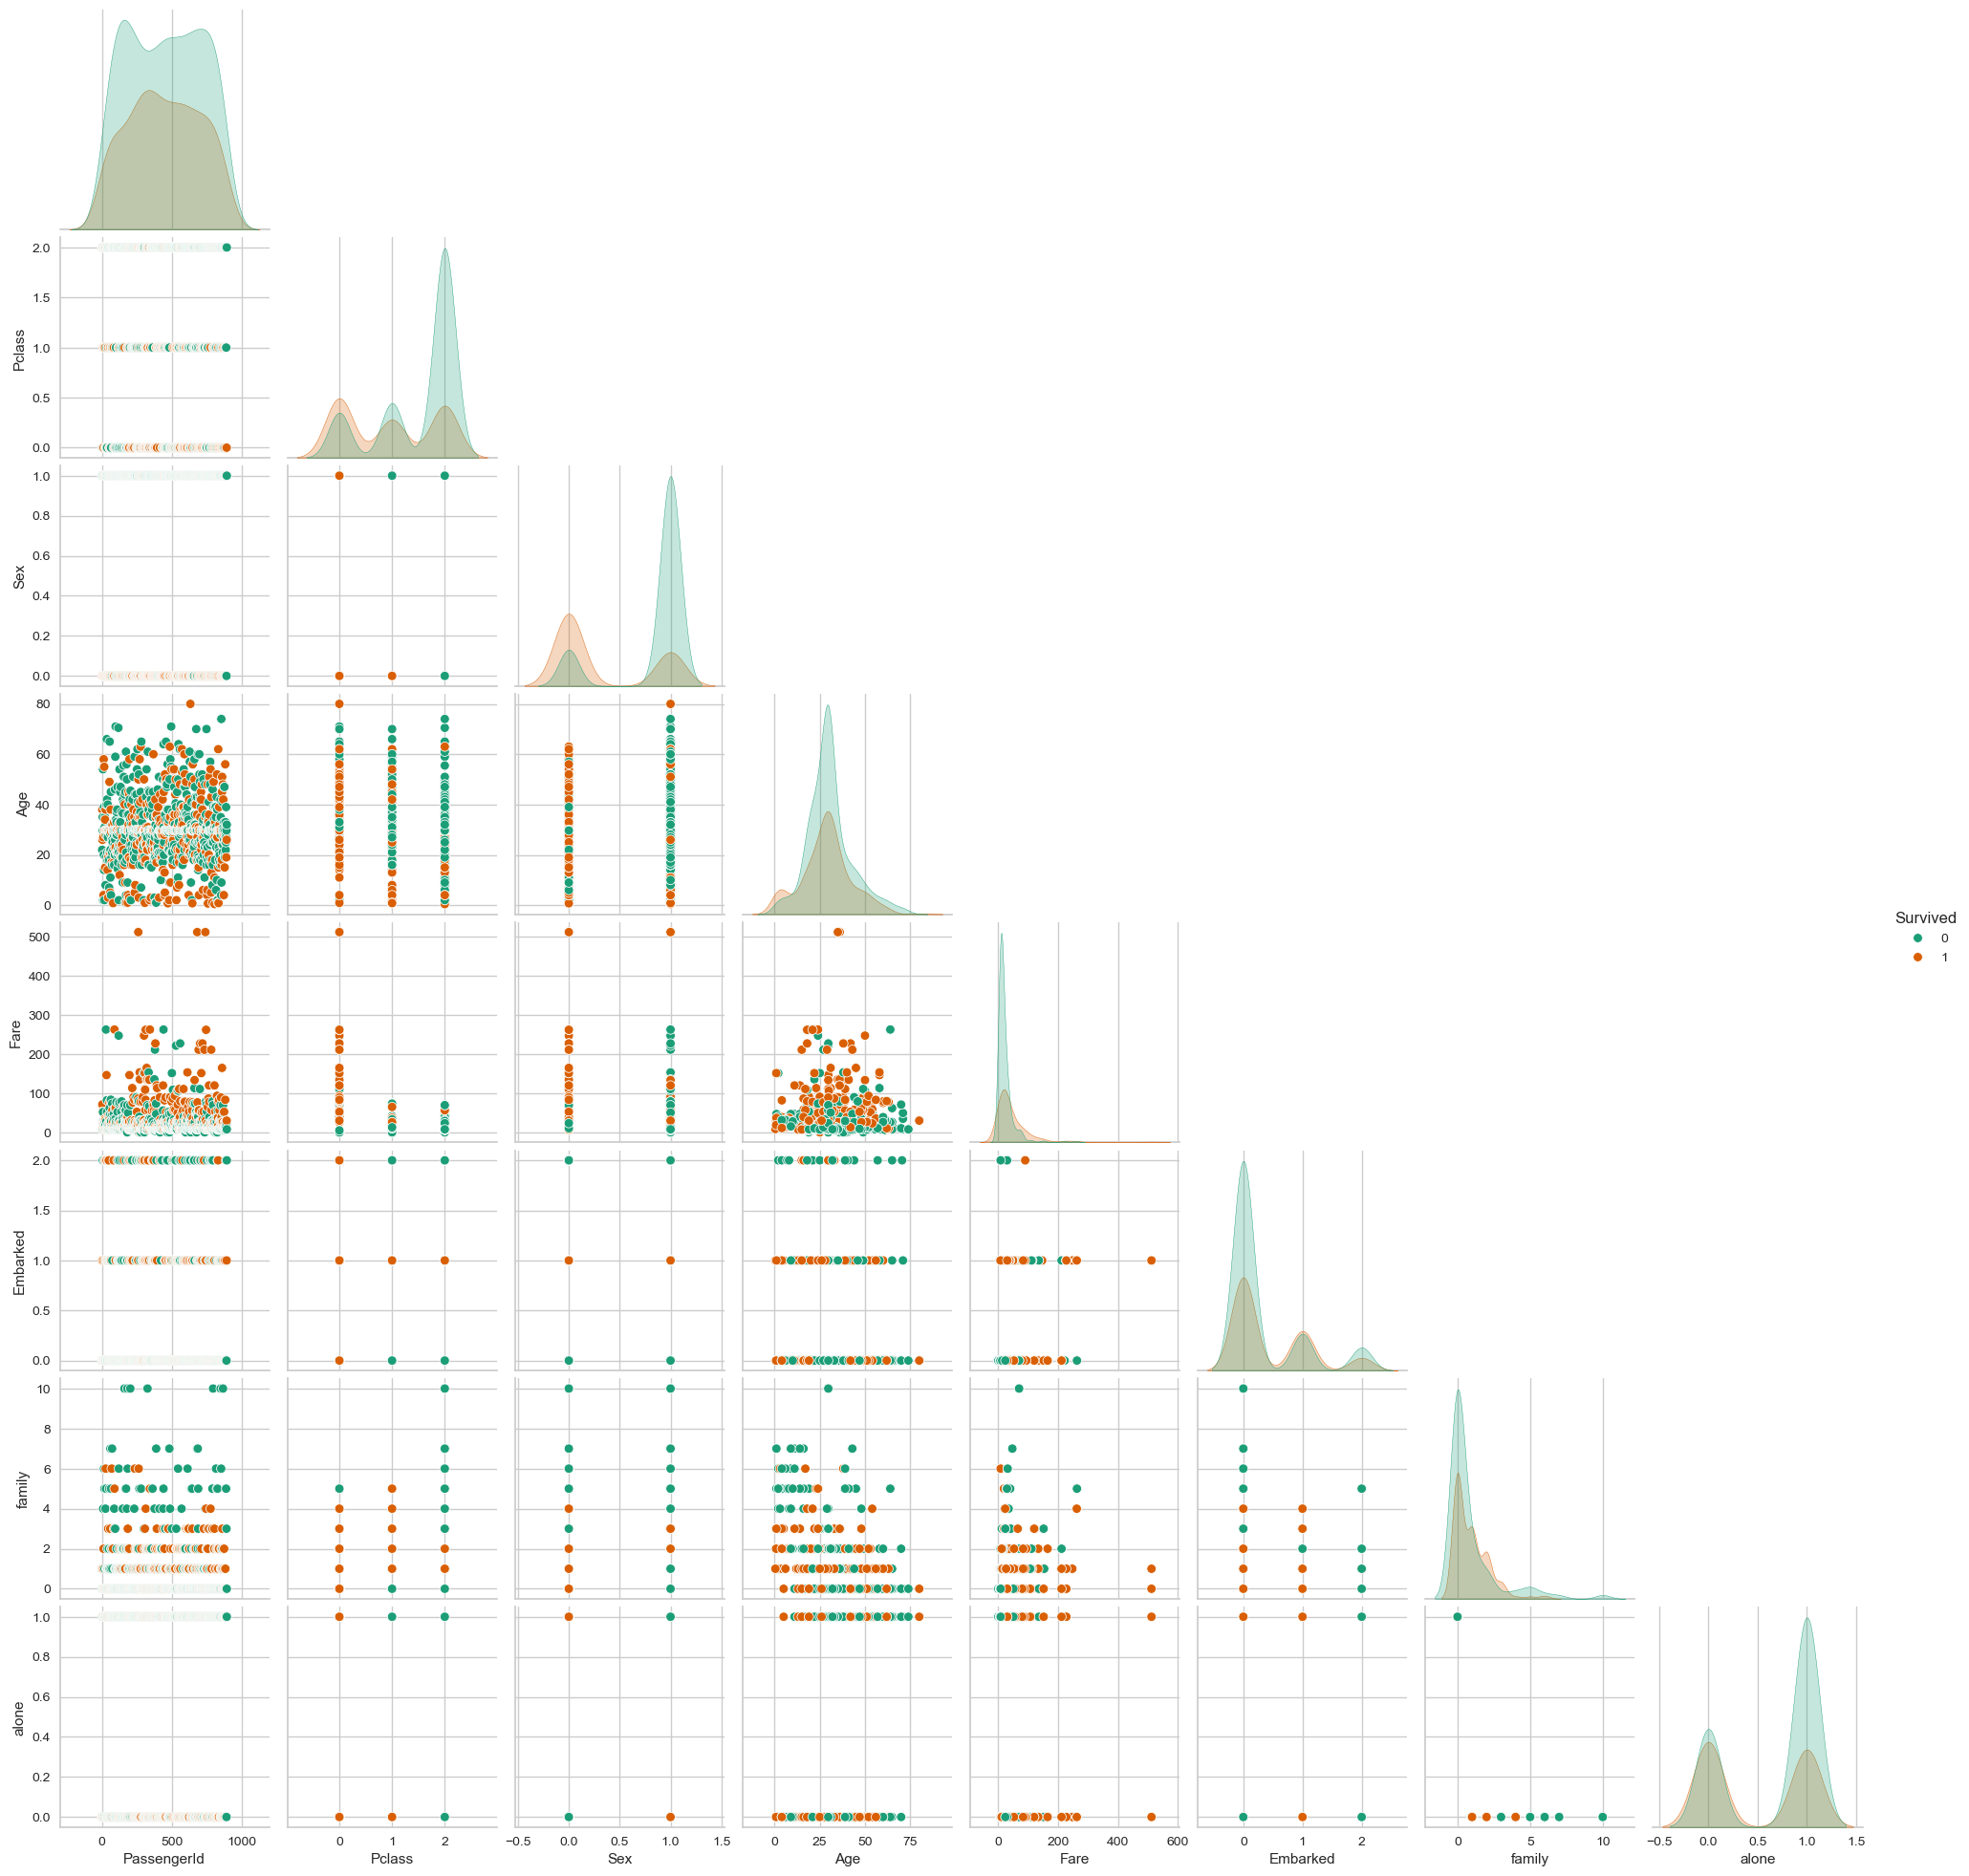

In [26]:
sns.pairplot(data=df, hue='Survived',palette="Dark2", corner=True);

In [27]:
survival_rate = df.groupby('Sex')['Survived'].mean() 
survival_rate
# 0 Female
# 1 Male 

Sex
0    0.742038
1    0.188908
Name: Survived, dtype: float64

In [28]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

## Train | Test Split

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

In [30]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=61, stratify=y, test_size=0.15)

In [32]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (757, 8)
Train target shape   :  (757,)
Test features shape  :  (134, 8)
Test target shape    :  (134,)


In [33]:
cat = df.select_dtypes("object").columns
cat

Index([], dtype='object')


  <h1 style="background-color: #008080; font-family: newtimeroman; font-size: 200%; color: white; border-radius: 40px 10px; padding: 15px; text-align: center;"> <b>AdaBoosting Classifier</b>
</h1>

## Vanilla AdaBoosting 

In [34]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate

In [35]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [36]:
ada_model = AdaBoostClassifier(n_estimators=50, random_state=61)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=61)

In [37]:
eval_metric(ada_model, X_train, y_train, X_test, y_test)

Test_Set
[[75  8]
 [17 34]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        83
           1       0.81      0.67      0.73        51

    accuracy                           0.81       134
   macro avg       0.81      0.79      0.79       134
weighted avg       0.81      0.81      0.81       134


Train_Set
[[407  59]
 [ 73 218]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       466
           1       0.79      0.75      0.77       291

    accuracy                           0.83       757
   macro avg       0.82      0.81      0.81       757
weighted avg       0.82      0.83      0.82       757



## GridSearch AdaBoosting 

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [39]:
model_pipeline = Pipeline([('scaler', StandardScaler()), ('AdaBoost', AdaBoostClassifier(random_state=42))])

In [40]:
param_grid = {
    "AdaBoost__n_estimators": [50, 100, 200],
    "AdaBoost__learning_rate": [0.01, 0.1, 0.5, 1]
}

In [41]:
ada_grid_model = GridSearchCV(model_pipeline, param_grid, cv=5, scoring="recall")
ada_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('AdaBoost',
                                        AdaBoostClassifier(random_state=42))]),
             param_grid={'AdaBoost__learning_rate': [0.01, 0.1, 0.5, 1],
                         'AdaBoost__n_estimators': [50, 100, 200]},
             scoring='recall')

In [42]:
ada_grid_model.best_params_

{'AdaBoost__learning_rate': 0.1, 'AdaBoost__n_estimators': 200}

In [43]:
ada_grid_model.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('AdaBoost',
                 AdaBoostClassifier(learning_rate=0.1, n_estimators=200,
                                    random_state=42))])

In [44]:
ada_grid_model.best_score_

0.7250146113383986

In [45]:
y_pred = ada_grid_model.predict(X_test)
y_pred_proba = ada_grid_model.predict_proba(X_test)

ada_f1 = f1_score(y_test, y_pred)
ada_recall = recall_score(y_test, y_pred)
ada_auc = roc_auc_score(y_test, y_pred_proba[:,1])
eval_metric(ada_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[75  8]
 [19 32]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        83
           1       0.80      0.63      0.70        51

    accuracy                           0.80       134
   macro avg       0.80      0.77      0.78       134
weighted avg       0.80      0.80      0.79       134


Train_Set
[[411  55]
 [ 77 214]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       466
           1       0.80      0.74      0.76       291

    accuracy                           0.83       757
   macro avg       0.82      0.81      0.81       757
weighted avg       0.82      0.83      0.82       757



### Feature_Importances

In [46]:
model = AdaBoostClassifier(n_estimators=50, learning_rate=0.5, random_state=61)
model.fit(X_train, y_train)
model.feature_importances_

feats = pd.DataFrame(index=X.columns, data= model.feature_importances_, columns=['ada_importance'])
ada_imp_feats = feats.sort_values("ada_importance", ascending = False)
ada_imp_feats

ada_importance
Age                    0.28
Fare                   0.28
PassengerId            0.14
Sex                    0.12
family                 0.12
Pclass                 0.04
Embarked               0.02
alone                  0.00

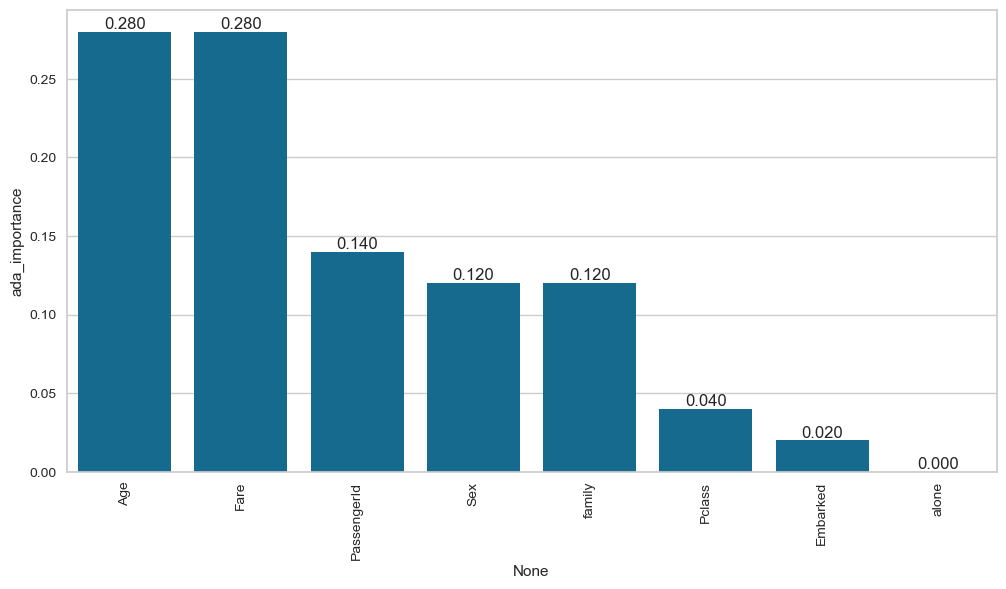

In [47]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=ada_imp_feats, x=ada_imp_feats.index, y='ada_importance')
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.xticks(rotation=90);

### Evaluating ROC Curves and AUC

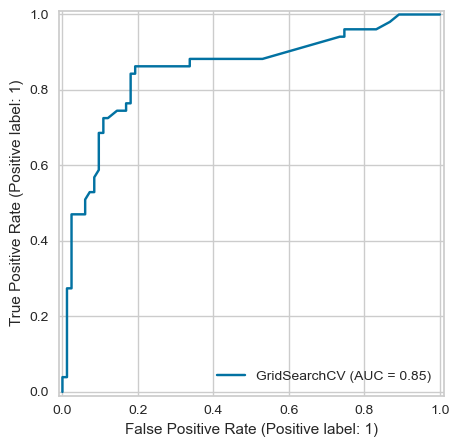

In [48]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(ada_grid_model, X_test, y_test);

<h1 style="background-color: #008080; font-family: newtimeroman; font-size: 200%; color: white; border-radius: 40px 10px; padding: 15px; text-align: center;"> <b>Gradient Boosting Classifier</b>
</h1>

## Vanilla Gradient Boosting

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
grad_model = GradientBoostingClassifier(random_state=61)
grad_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=61)

In [51]:
eval_metric(grad_model, X_train, y_train, X_test, y_test)

Test_Set
[[78  5]
 [15 36]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        83
           1       0.88      0.71      0.78        51

    accuracy                           0.85       134
   macro avg       0.86      0.82      0.83       134
weighted avg       0.85      0.85      0.85       134


Train_Set
[[449  17]
 [ 54 237]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       466
           1       0.93      0.81      0.87       291

    accuracy                           0.91       757
   macro avg       0.91      0.89      0.90       757
weighted avg       0.91      0.91      0.90       757



## GridSearch Gradient Boosting

In [52]:
model_pipeline = Pipeline([('scaler', StandardScaler()), ('GBM', GradientBoostingClassifier(random_state=61))])

In [53]:
param_grid = {
    "GBM__n_estimators": [100, 200, 300],
    "GBM__subsample": [0.8, 0.10],
    "GBM__max_features": [None, 2, 3],
    "GBM__learning_rate": [0.01, 0.1, 0.5, 0.7],
    "GBM__max_depth": [4, 7]
}

In [54]:
gbm_grid = GridSearchCV(model_pipeline, param_grid, scoring= "recall").fit(X_train, y_train)

In [55]:
gbm_grid.best_params_

{'GBM__learning_rate': 0.1,
 'GBM__max_depth': 4,
 'GBM__max_features': 2,
 'GBM__n_estimators': 200,
 'GBM__subsample': 0.8}

In [56]:
gbm_grid.best_score_

0.7386323787258913

In [57]:
y_pred = gbm_grid.predict(X_test)

gb_f1 = f1_score(y_test, y_pred)
gb_recall = recall_score(y_test, y_pred)
gb_auc = roc_auc_score(y_test, y_pred)

eval_metric(gbm_grid, X_train, y_train, X_test, y_test)

Test_Set
[[76  7]
 [15 36]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.87        83
           1       0.84      0.71      0.77        51

    accuracy                           0.84       134
   macro avg       0.84      0.81      0.82       134
weighted avg       0.84      0.84      0.83       134


Train_Set
[[460   6]
 [ 21 270]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       466
           1       0.98      0.93      0.95       291

    accuracy                           0.96       757
   macro avg       0.97      0.96      0.96       757
weighted avg       0.96      0.96      0.96       757



### Feature Importances

In [58]:
model = GradientBoostingClassifier(learning_rate=0.5, max_features= None,max_depth=4, n_estimators = 100, subsample = 0.1, random_state=61)
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['grad_importance'])
grad_imp_feats = feats.sort_values("grad_importance")
grad_imp_feats

grad_importance
alone               0.003049
family              0.053016
Pclass              0.087891
Sex                 0.135278
Embarked            0.135473
Age                 0.168705
PassengerId         0.169922
Fare                0.246666

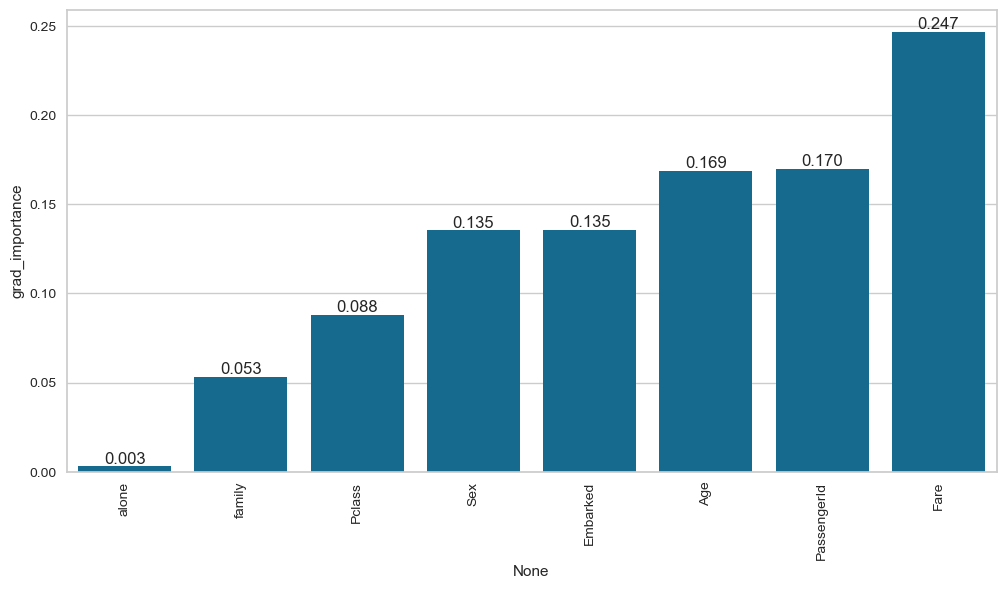

In [59]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=grad_imp_feats,
                 x=grad_imp_feats.index,
                 y='grad_importance')
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.xticks(rotation=90);

### Evaluating ROC Curves and AUC

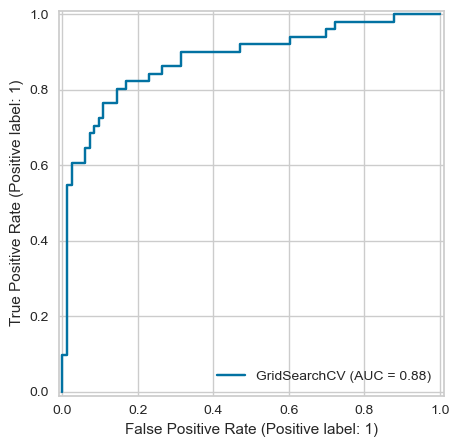

In [60]:
RocCurveDisplay.from_estimator(gbm_grid, X_test, y_test);


  <h1 style="background-color: #008080; font-family: newtimeroman; font-size: 200%; color: white; border-radius: 40px 10px; padding: 15px; text-align: center;"> <b>XGBoosting Classifier</b>
</h1>

## Vanilla XGBoosting

In [61]:
from xgboost import XGBClassifier

In [62]:
xgb = XGBClassifier(random_state = 61).fit(X_train, y_train)

In [63]:
eval_metric(xgb, X_train, y_train, X_test, y_test)

Test_Set
[[73 10]
 [14 37]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        83
           1       0.79      0.73      0.76        51

    accuracy                           0.82       134
   macro avg       0.81      0.80      0.81       134
weighted avg       0.82      0.82      0.82       134


Train_Set
[[466   0]
 [  0 291]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       466
           1       1.00      1.00      1.00       291

    accuracy                           1.00       757
   macro avg       1.00      1.00      1.00       757
weighted avg       1.00      1.00      1.00       757



## Gridsearch for XGBoost

In [64]:
model_pipeline = Pipeline([('scaler', StandardScaler()), ('XGB', XGBClassifier(random_state=42))])

In [65]:
param_grid = {
    "XGB__n_estimators": [50, 100, 200, 250],
    "XGB__max_depth": [2, 3, 4, 5],
    "XGB__learning_rate": [0.01, 0.05, 0.1, 0.5],
    "XGB__subsample": [0.5, 0.8, 0.10],
    "XGB__colsample_bytree": [0.5, 0.8, 0.10]
}

In [66]:
xgb_grid = GridSearchCV(model_pipeline,
                        param_grid,
                        scoring="recall",
                        n_jobs=-1,
                        return_train_score=True).fit(X_train, y_train)

In [67]:
xgb_grid.best_params_

{'XGB__colsample_bytree': 0.5,
 'XGB__learning_rate': 0.5,
 'XGB__max_depth': 2,
 'XGB__n_estimators': 100,
 'XGB__subsample': 0.5}

In [68]:
xgb_grid.best_score_

0.7320280537697252

In [69]:
y_pred = xgb_grid.predict(X_test)

xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)

eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Test_Set
[[73 10]
 [15 36]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        83
           1       0.78      0.71      0.74        51

    accuracy                           0.81       134
   macro avg       0.81      0.79      0.80       134
weighted avg       0.81      0.81      0.81       134


Train_Set
[[444  22]
 [ 68 223]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       466
           1       0.91      0.77      0.83       291

    accuracy                           0.88       757
   macro avg       0.89      0.86      0.87       757
weighted avg       0.88      0.88      0.88       757



### Feature Importances in XGBoost

In [70]:
model = XGBClassifier(n_estimators= 200, 
                      colsample_bytree = 0.8, subsample= 0.8, 
                      learning_rate = 0.5,max_depth= 2, 
                      random_state = 61)

model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['xgb_importance'])
xgb_imp_feats = feats.sort_values("xgb_importance")
xgb_imp_feats

xgb_importance
Embarked           0.047215
PassengerId        0.050680
Age                0.057636
Fare               0.058896
alone              0.073436
family             0.078798
Pclass             0.183329
Sex                0.450008

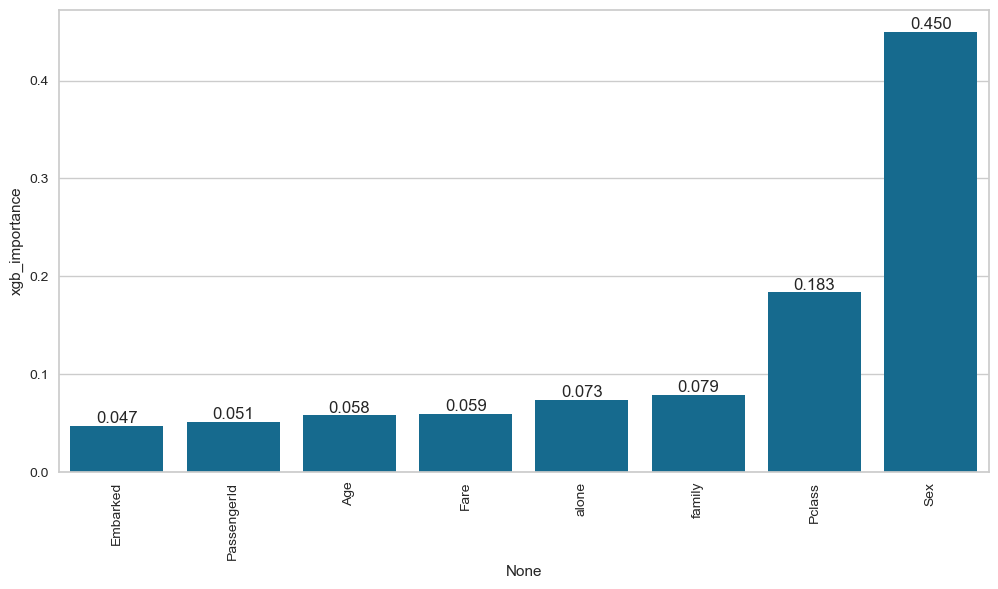

In [71]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index, y='xgb_importance')
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.xticks(rotation=90);

### Evaluating ROC Curves and AUC

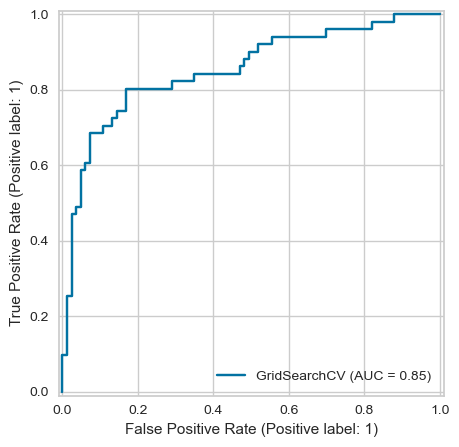

In [72]:
RocCurveDisplay.from_estimator(xgb_grid, X_test, y_test);


  <h1 style="background-color: #008080; font-family: newtimeroman; font-size: 200%; color: white; border-radius: 40px 10px; padding: 15px; text-align: center;"> <b>Light GBM</b>
</h1> 

In [73]:
from lightgbm import LGBMClassifier

## Vanilla Light GBM

In [74]:
lgbm_model = LGBMClassifier(random_state=61).fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 291, number of negative: 466
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 461
[LightGBM] [Info] Number of data points in the train set: 757, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.384412 -> initscore=-0.470862
[LightGBM] [Info] Start training from score -0.470862
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [75]:
eval_metric(lgbm_model, X_train, y_train, X_test, y_test)

Test_Set
[[76  7]
 [13 38]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        83
           1       0.84      0.75      0.79        51

    accuracy                           0.85       134
   macro avg       0.85      0.83      0.84       134
weighted avg       0.85      0.85      0.85       134


Train_Set
[[466   0]
 [  1 290]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       466
           1       1.00      1.00      1.00       291

    accuracy                           1.00       757
   macro avg       1.00      1.00      1.00       757
weighted avg       1.00      1.00      1.00       757



## Gridsearch for Light GBM

In [76]:
model_pipeline = Pipeline([('scaler', StandardScaler()), ('LGBM', LGBMClassifier(random_state=61))])

In [77]:
param_grid = {
    'LGBM__learning_rate': [0.1, 1],
    'LGBM__n_estimators': [50, 100, 200],
    'LGBM__num_leaves': [20, 30, 50],  
    'LGBM__max_depth': [-1, 3, 4, 5],     
    'LGBM__subsample': [0.8, 1.0],
    'LGBM__colsample_bytree': [0.8, 1.0]
}

In [78]:
lgbm_grid = GridSearchCV(estimator=model_pipeline,
                         param_grid=param_grid,
                         cv=5,
                         scoring='recall',
                         n_jobs=-1,
                         return_train_score=True).fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 291, number of negative: 466
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000626 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 468
[LightGBM] [Info] Number of data points in the train set: 757, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.384412 -> initscore=-0.470862
[LightGBM] [Info] Start training from score -0.470862
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [79]:
lgbm_grid.best_params_

{'LGBM__colsample_bytree': 0.8,
 'LGBM__learning_rate': 1,
 'LGBM__max_depth': 4,
 'LGBM__n_estimators': 100,
 'LGBM__num_leaves': 20,
 'LGBM__subsample': 0.8}

In [80]:
lgbm_grid.best_score_

0.7182349503214495

In [81]:
y_pred = lgbm_grid.predict(X_test)

lgbm_f1 = f1_score(y_test, y_pred)
lgbm_recall = recall_score(y_test, y_pred)
lgbm_auc = roc_auc_score(y_test, y_pred)

eval_metric(lgbm_grid, X_train, y_train, X_test, y_test)

Test_Set
[[72 11]
 [15 36]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        83
           1       0.77      0.71      0.73        51

    accuracy                           0.81       134
   macro avg       0.80      0.79      0.79       134
weighted avg       0.80      0.81      0.80       134


Train_Set
[[466   0]
 [  0 291]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       466
           1       1.00      1.00      1.00       291

    accuracy                           1.00       757
   macro avg       1.00      1.00      1.00       757
weighted avg       1.00      1.00      1.00       757



### Feature Importances

In [82]:
model = LGBMClassifier(random_state=61, colsample_bytree = 0.8, 
                       subsample= 0.8, learning_rate= 1, 
                       max_depth= -1, n_estimators=50,
                      num_leaves= 20)
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['lgbm_importance'])
lgbm_imp_feats = feats.sort_values("lgbm_importance")
lgbm_imp_feats

[LightGBM] [Info] Number of positive: 291, number of negative: 466
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000437 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 461
[LightGBM] [Info] Number of data points in the train set: 757, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.384412 -> initscore=-0.470862
[LightGBM] [Info] Start training from score -0.470862


lgbm_importance
alone                      9
Pclass                    26
Sex                       30
Embarked                  42
family                    43
Age                      235
Fare                     248
PassengerId              317

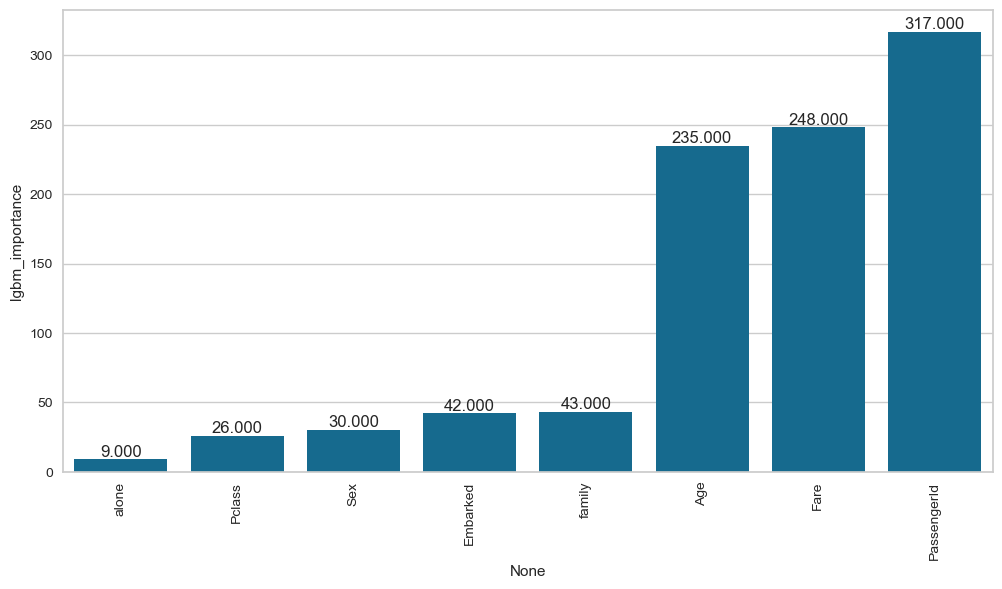

In [83]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=lgbm_imp_feats, x=lgbm_imp_feats.index, y='lgbm_importance')
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.xticks(rotation=90);

### Evaluating ROC Curves and AUC

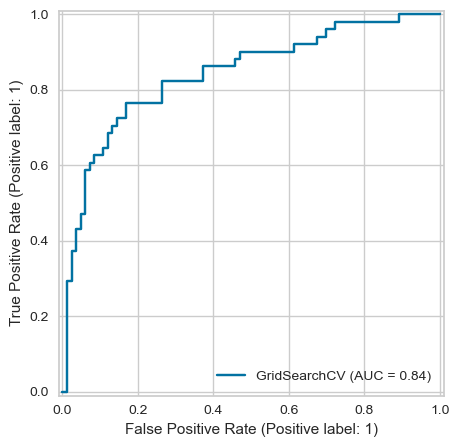

In [84]:
RocCurveDisplay.from_estimator(lgbm_grid, X_test, y_test);


  <h1 style="background-color: #008080; font-family: newtimeroman; font-size: 200%; color: white; border-radius: 40px 10px; padding: 15px; text-align: center;"> <b> Random Forests</b>
</h1> 

In [85]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=61)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
rf_f1 = f1_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_auc = roc_auc_score(y_test, y_pred)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[76  7]
 [14 37]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        83
           1       0.84      0.73      0.78        51

    accuracy                           0.84       134
   macro avg       0.84      0.82      0.83       134
weighted avg       0.84      0.84      0.84       134


Train_Set
[[466   0]
 [  0 291]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       466
           1       1.00      1.00      1.00       291

    accuracy                           1.00       757
   macro avg       1.00      1.00      1.00       757
weighted avg       1.00      1.00      1.00       757



 <h1 style="background-color: #008080; font-family: newtimeroman; font-size: 200%; color: white; border-radius: 40px 10px; padding: 15px; text-align: center;"> <b> Decision Tree</b>
</h1> 

In [86]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=61)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
dt_f1 = f1_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_auc = roc_auc_score(y_test, y_pred)
eval_metric(dt_model, X_train, y_train, X_test, y_test)

Test_Set
[[64 19]
 [23 28]]
              precision    recall  f1-score   support

           0       0.74      0.77      0.75        83
           1       0.60      0.55      0.57        51

    accuracy                           0.69       134
   macro avg       0.67      0.66      0.66       134
weighted avg       0.68      0.69      0.68       134


Train_Set
[[466   0]
 [  0 291]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       466
           1       1.00      1.00      1.00       291

    accuracy                           1.00       757
   macro avg       1.00      1.00      1.00       757
weighted avg       1.00      1.00      1.00       757



 <h1 style="background-color: #008080; font-family: newtimeroman; font-size: 200%; color: white; border-radius: 40px 10px; padding: 15px; text-align: center;"> <b>Logistic Regression </b>
</h1> 

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model=LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred=log_model.predict(X_test_scaled)
log_f1 = f1_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_auc = roc_auc_score(y_test, y_pred)
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[76  7]
 [19 32]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.85        83
           1       0.82      0.63      0.71        51

    accuracy                           0.81       134
   macro avg       0.81      0.77      0.78       134
weighted avg       0.81      0.81      0.80       134


Train_Set
[[405  61]
 [ 85 206]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       466
           1       0.77      0.71      0.74       291

    accuracy                           0.81       757
   macro avg       0.80      0.79      0.79       757
weighted avg       0.81      0.81      0.81       757



 <h1 style="background-color: #008080; font-family: newtimeroman; font-size: 200%; color: white; border-radius: 40px 10px; padding: 15px; text-align: center;"> <b>KNN </b>
</h1> 

In [89]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)
knn_f1 = f1_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_auc = roc_auc_score(y_test, y_pred)
eval_metric(knn_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[77  6]
 [15 36]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        83
           1       0.86      0.71      0.77        51

    accuracy                           0.84       134
   macro avg       0.85      0.82      0.83       134
weighted avg       0.84      0.84      0.84       134


Train_Set
[[431  35]
 [ 67 224]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       466
           1       0.86      0.77      0.81       291

    accuracy                           0.87       757
   macro avg       0.87      0.85      0.85       757
weighted avg       0.87      0.87      0.86       757



 <h1 style="background-color: #008080; font-family: newtimeroman; font-size: 200%; color: white; border-radius: 40px 10px; padding: 15px; text-align: center;"> <b>SVC</b>
</h1> 

In [90]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)
svc_f1 = f1_score(y_test, y_pred)
svc_recall = recall_score(y_test, y_pred)
svc_auc = roc_auc_score(y_test, y_pred)
eval_metric(svm_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[77  6]
 [19 32]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        83
           1       0.84      0.63      0.72        51

    accuracy                           0.81       134
   macro avg       0.82      0.78      0.79       134
weighted avg       0.82      0.81      0.81       134


Train_Set
[[422  44]
 [ 79 212]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       466
           1       0.83      0.73      0.78       291

    accuracy                           0.84       757
   macro avg       0.84      0.82      0.82       757
weighted avg       0.84      0.84      0.84       757



 <h1 style="background-color: darkred; font-family: newtimeroman; font-size: 200%; color: white; border-radius: 40px 10px; padding: 15px; text-align: center;"> <b>Comparing Models</b>
</h1> 

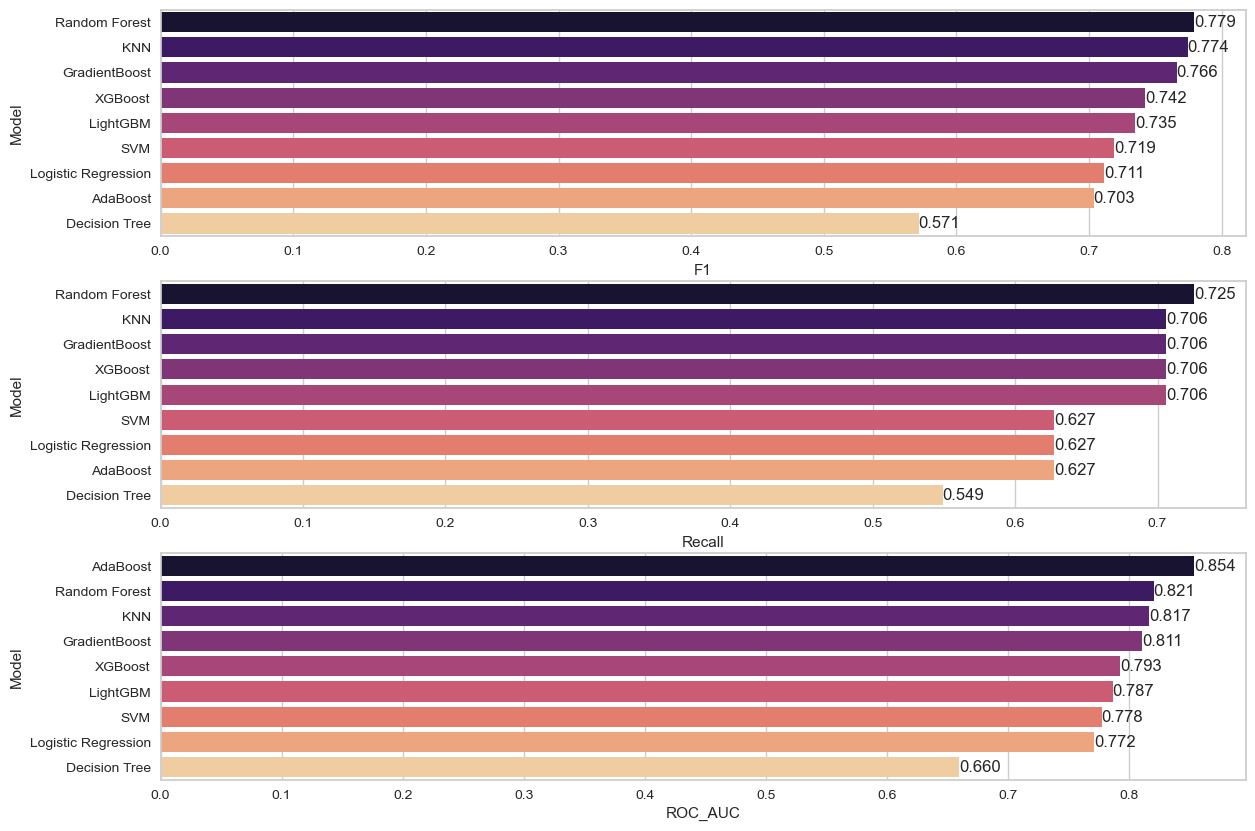

In [91]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "KNN", "SVM", "Decision Tree", "Random Forest", "AdaBoost",
                                 "GradientBoost", "XGBoost", "LightGBM"],
                        "F1": [log_f1, knn_f1, svc_f1, dt_f1, rf_f1, ada_f1, gb_f1, xgb_f1, lgbm_f1],
                        "Recall": [log_recall, knn_recall, svc_recall, dt_recall, rf_recall, ada_recall, gb_recall, xgb_recall, lgbm_recall],
                        "ROC_AUC": [log_auc, knn_auc, svc_auc, dt_auc, rf_auc, ada_auc, gb_auc, xgb_auc, lgbm_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="magma")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="magma")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="magma")
labels(ax)
plt.show()

 <h1 style="background-color: #008080; font-family: newtimeroman; font-size: 200%; color: white; border-radius: 40px 10px; padding: 15px; text-align: center;"> <b> Lazy Predict</b>
</h1>  

In [92]:
from lazypredict.Supervised import LazyClassifier

ModuleNotFoundError: No module named 'lazypredict'

In [ ]:
pd.set_option('display.max_columns', None)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

  <h1 style="background-color: red; font-family: newtimeroman; font-size: 200%; color: white; border-radius: 40px 10px; padding: 15px; text-align: center;"> <b>Final Model </b>
</h1>   

## Prediction Test EDA

In [ ]:
gender_submission_df = pd.read_csv('gender_submission.csv')

In [ ]:
gender_submission_df

In [ ]:
prediction_test

### Drop Unnecessary Columns

In [ ]:
prediction_test['family'] = prediction_test['SibSp'] + prediction_test['Parch']
prediction_test = prediction_test.drop(columns = ['SibSp', 'Parch'])

In [ ]:
prediction_test['alone'] = np.where(prediction_test['family'] == 0, 1, 0)

In [ ]:
prediction_test.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

### Embarked

In [ ]:
simple_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
simple_imp.fit(prediction_test[["Embarked"]])
prediction_test[["Embarked"]] = simple_imp.fit_transform(prediction_test[["Embarked"]])

In [ ]:
class_mapping = {'S': 0, 'C': 1, 'Q': 2}
prediction_test['Embarked'] = prediction_test['Embarked'].map(class_mapping)

### Age 

In [ ]:
from sklearn.impute import KNNImputer

KNN_imputer = KNNImputer(n_neighbors = 4)
prediction_test[["Age"]] = KNN_imputer.fit_transform(prediction_test[["Age"]])

In [ ]:
prediction_test["Age"].isna().sum()

### Pclass

In [ ]:
class_mapping = {3:2, 2:1, 1:0}
prediction_test['Pclass'] = prediction_test['Pclass'].map(class_mapping)

In [ ]:
prediction_test['Pclass'].value_counts()
# 2 = 3
# 0 = 1
# 1 = 2

### Sex

In [ ]:
class_mapping = {'female': 0, 'male': 1}
prediction_test['Sex'] = prediction_test['Sex'].map(class_mapping)

In [ ]:
prediction_test['Sex'].value_counts()

## Conclusion

In [ ]:
prediction_test

In [ ]:
predictions = lgbm_grid.predict(prediction_test)

print(predictions)

In [ ]:
y_true = gender_submission_df['Survived'].values

if len(predictions) != len(y_true):
    print(f"The number of predictions ({len(predictions)}) does not match the number of actual labels ({len(y_true)}).")
else:
    accuracy = accuracy_score(y_true, predictions)
    precision = precision_score(y_true, predictions)
    recall = recall_score(y_true, predictions)
    f1 = f1_score(y_true, predictions)
    conf_matrix = confusion_matrix(y_true, predictions)

    metrics_info = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix
    }
    metrics_info

In [ ]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(conf_matrix).plot(values_format='d');